<a href="https://colab.research.google.com/github/Mubasshir-Ali/Deep_Learning_Practice/blob/master/Color_Images_Dogs_vs_Cats_With_Augmentation_Using_CNNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Dogs vs Cats Image Classification With Image Augmentation


In [0]:
#@title Import Packages

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#@title Data Loading


In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [6]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [0]:
# We'll now assign variables with the proper file path for the training and validation sets.
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') # directory training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # directory training dog pictures

validation_cats_dir = os.path.join(validation_dir, 'cats') # directory validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # directory validation dog pictures

In [0]:
#@title Understanding Our Data


In [0]:
# Let's look at how many cats and dogs images we have in our training and validation directory
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('Total Training Cat Images:', num_cats_tr)
print('Total Training Dog Images:', num_dogs_tr)

print('Total Validation Cat Images:', num_cats_val)
print('Total Validation Dog Images:', num_dogs_val)

print('---------------------------')

print('Total Training Images:', total_train)
print('Total Validation Images:', total_val)

Total Training Cat Images: 1000
Total Training Dog Images: 1000
Total Validation Cat Images: 500
Total Validation Dog Images: 500
---------------------------
Total Training Images: 2000
Total Validation Images: 1000


In [0]:
#@title Setting Model Parameters


In [0]:
# Number of training examples to process before updating our models variables
BATCH_SIZE = 100

# Our training data consists of images with width of 150 pixels and height of 150 pixels
IMG_SHAPE = 150

In [0]:
#@title Data Augmentation


Overfitting often occurs when we have a small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number and variety of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples through random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This exposes the model to more aspects of the data, allowing it to generalize better.

In tf.keras we can implement this using the same ImageDataGenerator class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

To start off, let's define a function that can display an image, so we can see the type of augmentation that has been performed. Then, we'll look at specific augmentations that we'll use during training.

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
      ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [0]:
#@title Flipping The Image Horizontally


We can begin by randomly applying horizontal flip augmentation to our dataset and seeing how individual images will look after the transformation. This is achieved by passing horizontal_flip=True as an argument to the ImageDataGenerator class.

In [12]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, 
                                               directory = train_dir, 
                                               shuffle = True, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


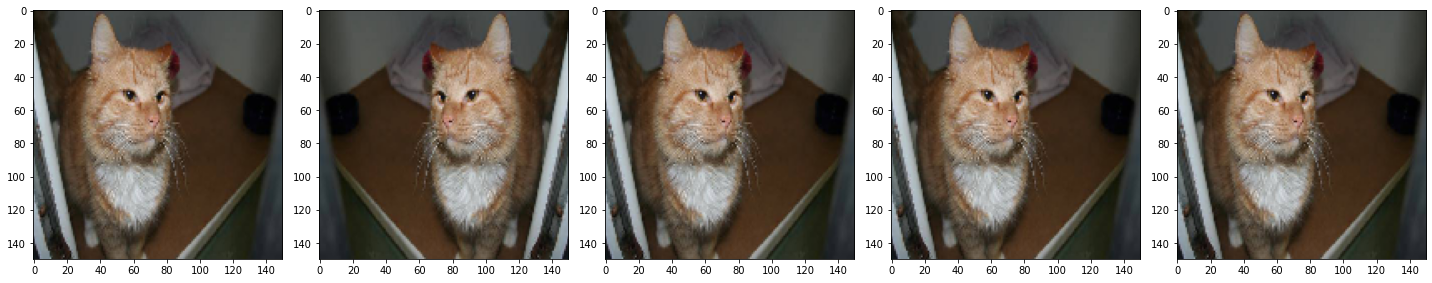

In [13]:
# To see the transformation in action, let's take one sample image from our training set and repeat it five times. The augmentation will be randomly applied (or not) to each repetition.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
#@title Rotating The Image


In [14]:
# The rotation augmentation will randomly rotate the image up to a specified number of degrees. Here, we'll set it to 45.
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, 
                                               directory = train_dir, 
                                               shuffle = True, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


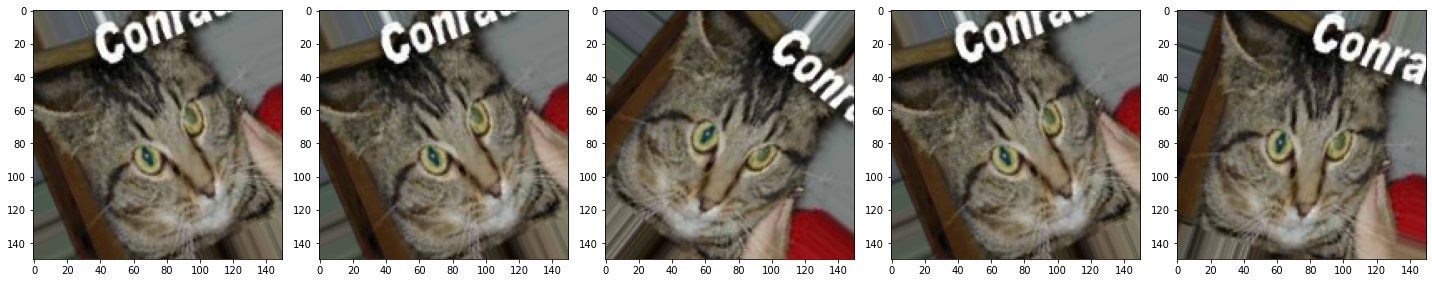

In [15]:
# To see the transformation in action, let's once again take a sample image from our training set and repeat it. The augmentation will be randomly applied (or not) to each repetition.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
#@title Applying Zoom


We can also apply Zoom augmentation to our dataset, zooming images up to 50% randomly.

In [16]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, 
                                               directory = train_dir, 
                                               shuffle = True, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


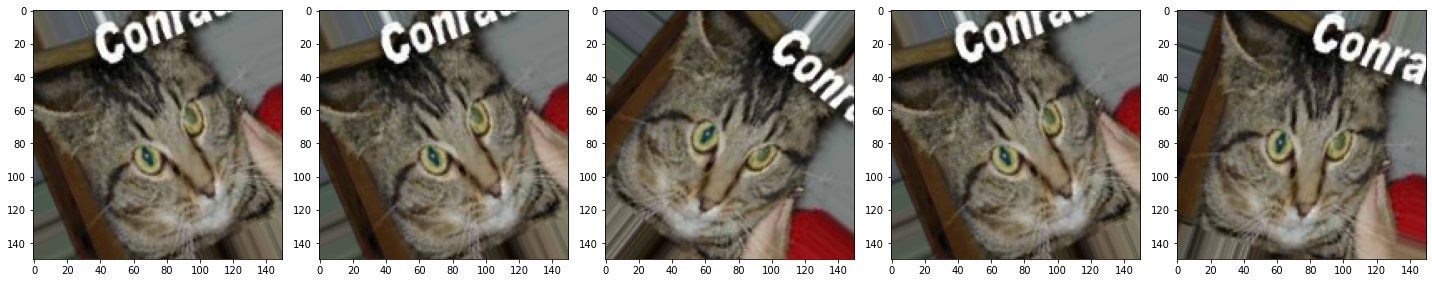

In [17]:
aumented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
#@title Putting It All Together

We can apply all these augmentations, and even others, with just one line of code, by passing the augmentations as arguments with proper values.

Here, we have applied rescale, rotation of 45 degrees, width shift, height shift, horizontal flip, and zoom augmentation to our training images.

In [19]:
image_gen_train = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 40, 
      width_shift_range = 0.5, 
      height_shift_range = 0.2, 
      shear_range = 0.2, 
      zoom_range = 0.2, 
      horizontal_flip = True, 
      fill_mode = 'nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE, 
                                                 directory = train_dir, 
                                                 shuffle = True, 
                                                 target_size = (IMG_SHAPE, IMG_SHAPE), 
                                                 class_mode = 'binary')

Found 2000 images belonging to 2 classes.


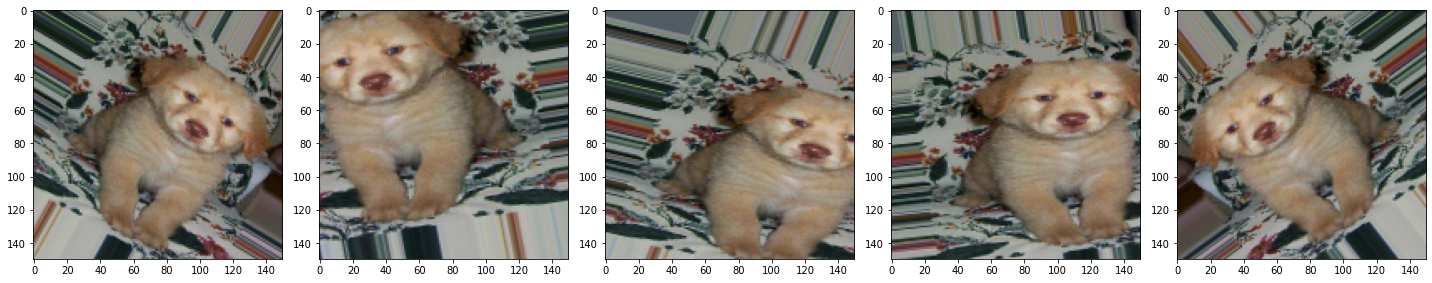

In [20]:
# Let's visualize how a single image would look like five different times, when we pass these augmentations randomly to our dataset.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
#@title Creating Validation Data Generator


Generally, we only apply data augmentation to our training examples, since the original images should be representative of what our model needs to manage. So, in this case we are only rescaling our validation images and converting them into batches using ImageDataGenerator.

In [21]:
image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = BATCH_SIZE, 
                                                 directory = validation_dir, 
                                                 target_size = (IMG_SHAPE, IMG_SHAPE), 
                                                 class_mode = 'binary') 

Found 1000 images belonging to 2 classes.


In [0]:
#@title Model Creation


In [0]:
#@title Define The Model


The model consists of four convolution blocks with a max pool layer in each of them.

Before the final Dense layers, we're also applying a Dropout probability of 0.5. It means that 50% of the values coming into the Dropout layer will be set to zero. This helps to prevent overfitting.

Then we have a fully connected layer with 512 units, with a relu activation function. The model will output class probabilities for two classes — dogs and cats — using softmax.

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (33), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2)                                
])

In [0]:
#@title Compile The Model


As usual, we will use the adam optimizer. Since we output a softmax categorization, we'll use sparse_categorical_crossentropy as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [0]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [0]:
#@title Model Summary


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      104576    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       1

In [0]:
#@title Train The Model


In [25]:
epochs = 100
history = model.fit_generator(
    train_data_gen, 
    steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))), 
    epochs = epochs, 
    validation_data = val_data_gen, 
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 17s 833ms/step - loss: 0.7369 - accuracy: 0.4950 - val_loss: 0.6928 - val_accuracy: 0.5030
Epoch 2/100
20/20 [==============================] - 17s 851ms/step - loss: 0.6955 - accuracy: 0.4950 - val_loss: 0.6930 - val_accuracy: 0.5090
Epoch 3/100
20/20 [==============================] - 17s 857ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6934 - val_accuracy: 0.4860
Epoch 4/100
20/20 [==============================] - 17s 851ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4870
Epoch 5/100
20/20 [==============================] - 17s 852ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5180
Epoch 6/100
20/20 [==============================] - 17s 858ms/step - loss: 0.6932 - accuracy: 0.4890 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 7/100
20/20 [==============================] - 17s 863

In [0]:
#@title Visualizing Results Of The Training


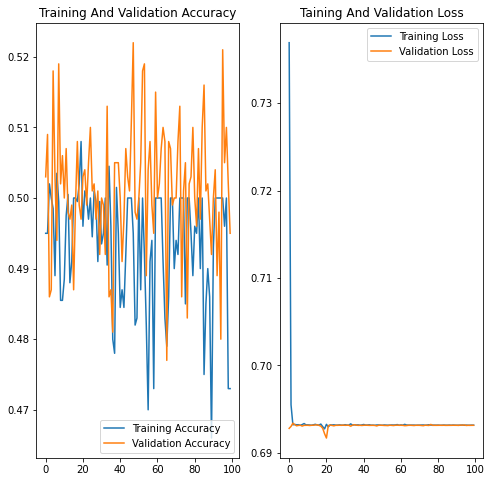

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Taining And Validation Loss')
plt.savefig('./foo.png')
plt.show()